<a href="https://colab.research.google.com/github/Jake7Harvey/OperationsResearchWork/blob/main/RegressionAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Assignment

I want you to practice some regression and analyzing your results.  Utilize this document to load data directly.

In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Fit goals vs points in a linear regression.  Fit a multiple regression on goals and assists vs points.  What do you notice about these two fits.
https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

In [2]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

###Goals vs Points

Slope =  [2.17678045] Y-Intercept =  [3.73724316] Regression =  [0.91987333] Prediction =  [0.08012667]


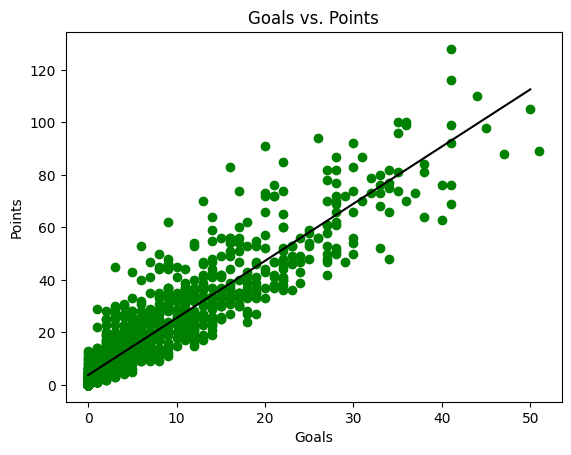

In [3]:
x = np.array(df[['G']])
y = np.array(df.PTS)
n = len(x)

meanx = sum(x)/n
meany = sum(y)/n
sumSquareX = 0
xy = 0
sx = 0

for i in range(n):
 sumSquareX += x[i]**2
 sumSquareX = int(sumSquareX)
sumSquareX /= n

for i in range(n):
  xy +=x[i]*y[i]
  xy = int(xy)
xy/=n

b1 = (xy - meanx*meany)/(sumSquareX-meanx**2)
b0 = meany - b1*meanx

for i in x:
  sx+= (i-meanx)**2

sx/=len(x)-1
sx = (sx)**(1/2)

sy = 0

for i in y:
  sy+= (i-meany)**2

sy/=len(y)-1
sy = (sy)**(1/2)
regression = len(x)*(xy - meanx*meany)/((len(x)-1)*sx*sy)
prediction = 1 - regression

def line(x):
  return b1*x+b0

import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 50, 100)
ys = line(xs)

plt.xlabel('Goals')
plt.ylabel('Points')
plt.title('Goals vs. Points')

plt.scatter(x,y, color='g')
plt.plot(xs,ys, color='k')

print("Slope = ",b1, "Y-Intercept = ",b0, "Regression = ",regression, "Prediction = ",prediction)

###Goals & Assists vs Points

In [4]:
x1 = np.array(df[['G']])
x2 = np.array(df[['A']])
y = np.array(df.PTS)
n = len(x)

meanx1 = sum(x1)/n
meanx2 = sum(x2)/n
meanx = meanx1 * meanx2
meany = sum(y)/n
xy = 0
sx = 0

for i in range(n):
 sumSquareX += (x1[i]**2)*(x2[i]**2)
sumSquareX /= n

for i in range(n):
  xy +=x1[i]*x2[i]*y[i]
  xy = int(xy)
xy/=n

b1 = (xy - meanx*meany)/(sumSquareX-meanx**2)
b0 = meany - b1*meanx

for i in x:
  sx+= (i-meanx)**2

sx/=len(x)-1
sx = (sx)**(1/2)

sy = 0

for i in y:
  sy+= (i-meany)**2

sy/=len(y)-1
sy = (sy)**(1/2)
regression = len(x)*(xy - meanx*meany)/((len(x)-1)*sx*sy)
prediction = 1 - regression


print("Slope = ",b1, "Y-Intercept = ",b0, "Regression = ",regression, "Prediction = ",prediction)

Slope =  [0.05237756] Y-Intercept =  [15.28268366] Regression =  [5.13511485] Prediction =  [-4.13511485]


The fits are very similar, only being a few decimal places off for their respective graphs. I am sure that my math is off for the multiple regression part, but I have faith that the linear regression is correct. The thing that stands out to me the most is that the more goals there is, the more points there is. The multiple regression follows a similar pattern, but instead the goals and assists are put together which increases the points.

## Logistic Regression

Using the 538 Avengers dataset,https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict `Death1` (first time a character might die) based on whatever variables you find interesting.  Make a prediction using probabilities on your favorite character.

In [5]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


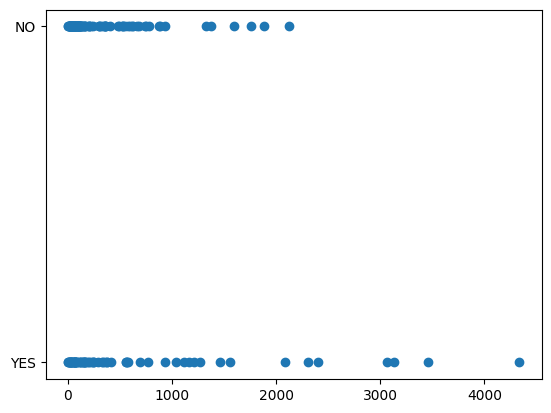

In [6]:
plt.scatter(df['Appearances'],df['Death1'])

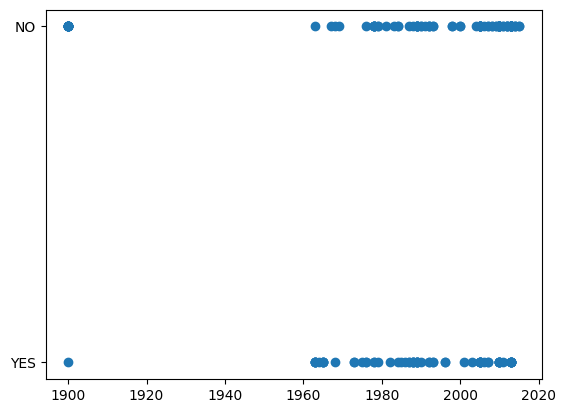

In [7]:
plt.scatter(df['Year'],df['Death1'])

Wade Wilson, Deadpool, is the character I chose to do the logistic regression over. Usually he cannot die, but throughout the Marvel Universe there are always surprises. I went off of years to tell when the predicted first death will be, and the data says that that later the character was created the quicker the first death will happen.

## Find Your Own Regression

I have compiled olympic 100m dash records from a wikipedia page https://en.wikipedia.org/wiki/100_metres_at_the_Olympics.  Use this data and fit a regression of some type for prediciting `Time`.  Justify your model used in words and pictures. Predict the new Olympic Record for 2024 and 2300.  Describe in words the validity of your predictions.

In [8]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
x = np.array(df)

df.head()

,Time,Athlete,Nation,Games,Round,Date,Gender
0,12.2,Francis Lane,United States (USA),1896,Heat 1,1896-04-06,Men
1,12.2,Thomas Curtis,United States (USA),1896,Heat 2,1896-04-06,Men
2,11.8,Tom Burke,United States (USA),1896,Heat 3,1896-04-06,Men
3,11.4,Arthur Duffey,United States (USA),1900,Heat 1,6/14/1900,Men
4,11.4,Walter Tewksbury,United States (USA),1900,Heat 2,6/14/1900,Men


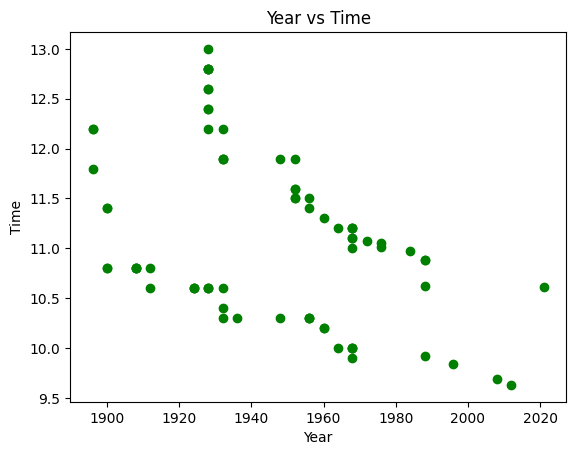

In [9]:
Year = np.array(df[['Games']])
Time = np.array(df[['Time']])

import numpy as np
import matplotlib.pyplot as plt

plt.xlabel('Year')
plt.ylabel('Time')
plt.title('Year vs Time')

plt.scatter(Year,Time, color='g')

While looking at the graph you can see the trend that the average times have gone down over the years. Following this trend, you can infer that the fastest time for the year 2024 will be somewhere between the times of 10.6s and 9.6s. In the year 2300 the record will more than likely be even closer to 0s because as the years increase the times decrease on average, and by using the Law of Large Numbers the more you increase in one thing, the more you decrease in the other.